## Assignment 1
### \ Haider Ali Lokhand \a1894658

In [79]:
# importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import json
from collections import Counter

[nltk_data] Downloading package punkt to /Users/haider/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haider/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/haider/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
# removing the warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Reading datasets

In [87]:
# (Colab) prompt: import a json file named random_30000_hotel_reviews.JSON and convert it into dataframe. concatenate the two columns of the created dataframe (title and text) into one named concat_textandtitle.
# From the newly created column remove all non-alphanumeric characters and tokenise the text.

# importing the data
with open('random_30000_hotel_reviews.JSON', 'r') as f:
  data = [json.loads(line) for line in f]

# Function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9]+', ' ', text)

df = pd.DataFrame(data) # creating the dataframe
df['concat_textandtitle'] = df['title'] + ' ' + df['text'] # concatenation
df['overall'] = [overall_rating['overall'] for overall_rating in df['ratings']] # creating an overall ratings column
df['concat_textandtitle'] = df['concat_textandtitle'].apply(remove_non_alphanumeric).apply(word_tokenize) # remove all non-alphanumeric characters and tokenize


In [88]:
# data visualization
df.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,concat_textandtitle,overall
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,"September 19, 2012",140716137,False,"[Horrible, experience, First, of, all, we, got...",1.0
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,"June 27, 2011",114807323,False,"[Stay, Away, Found, Racist, graffiti, in, the,...",1.0
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,"October 25, 2010",84805430,False,"[Great, location, and, service, Close, to, Uni...",4.0
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,"June 28, 2012",132971117,False,"[I, will, never, go, back, here, again, I, had...",2.0
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,"February 4, 2012",124104157,False,"[Ripped, off, our, VISA, card, after, departur...",1.0


In [83]:
# Visualization of labels
set(df['overall'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [89]:
# (Colab) prompt: Split df into training (first 10000 lines), development (next 10000 lines) and test (remaining 10000 lines).

train_data = df.iloc[:10000]
dev_data = df.iloc[10000:20000]
test_data = df.iloc[20000:]


In [90]:
# Splitting the dataset into random values to balance the representation of all classes
from sklearn.model_selection import train_test_split
train_data_random, temp_data_random = train_test_split(df, train_size=10000, random_state=1234)
dev_data_random, test_data_random = train_test_split(temp_data_random, test_size=10000, random_state=1234)

In [91]:
print(len(train_data), len(dev_data), len(test_data))

10000 10000 10000


In [92]:
print(len(train_data_random), len(dev_data_random), len(test_data_random))

10000 10000 10000


### 2. Exploratory Data Analysis (EDA)

In [93]:
# (Colab) prompt: perform distribution of "overall" rating in a data frame called dev_data which is inside the ratings columns as a key of a dictionary over number of instances and number of unique words

# Distribution of "overall" rating in dev_data
overall_ratings = dev_data['overall']

# Number of instances
num_instances = len(overall_ratings)

# Number of unique words
unique_words = set()
for review in dev_data['concat_textandtitle']:
  for word in review:
    unique_words.add(word)

print(f"Number of instances: {num_instances}")
print(f"Number of unique words: {len(unique_words)}")


Number of instances: 10000
Number of unique words: 31717


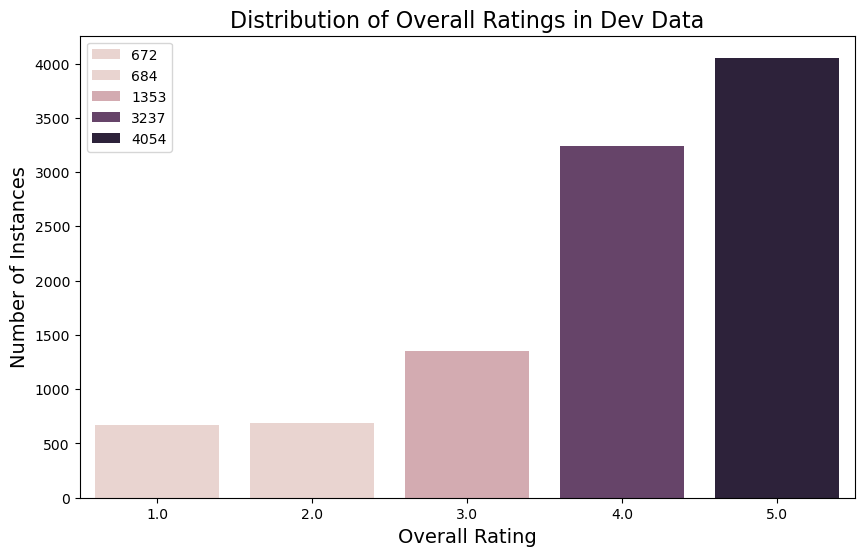

In [46]:
# (Colab) prompt: create a bar plot of overall ratings and number of instances from dev_data using sns. The overall ratings are {0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

overall_ratings = dev_data['overall']
num_instances = overall_ratings.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=num_instances.index, y=num_instances.values, hue=num_instances.values)

plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.title('Distribution of Overall Ratings in Dev Data', fontsize=16)
plt.show()

# We can see that the data has more number of ratings for 4.0 and 5.0 than combined 1.0, 2.0 and 3.0.


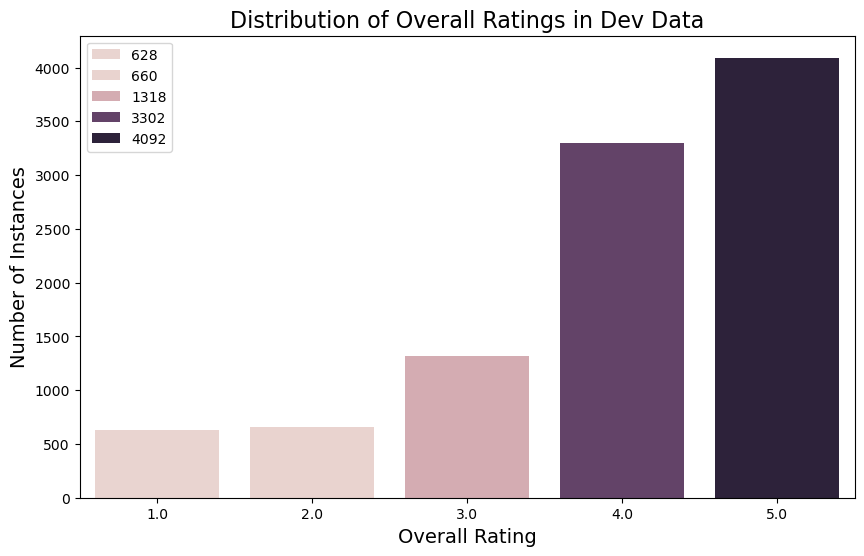

In [94]:
# Checking the distribution in the randomly distributed data set
# (Colab) prompt: create a bar plot of overall ratings and number of instances from dev_data using sns. The overall ratings are {0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

overall_ratings = dev_data_random['overall']
num_instances = overall_ratings.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=num_instances.index, y=num_instances.values, hue=num_instances.values)

plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.title('Distribution of Overall Ratings in Dev Data', fontsize=16)
plt.show()

# We can see that the data has more number of ratings for 4.0 and 5.0 than combined 1.0, 2.0 and 3.0.


#### Observation
Both the dataset shows the class imbalances where classes with 4.0 and 5.0 (positive reviews) are really high that the classes 0.0, 1.0, 2.0, 3.0 (negative reviews). 

To tackle this, we will use oversampling of the dataset to increase the representation of negative reviews.

In [95]:
# (ChatGPT-3.5) function to combine all the lists under the concat_textandtitle column of a dataframe
# Function to create a new list of all words used
def text_corpus(df):
    combined_list = []
    for text_list in df['concat_textandtitle']:
        combined_list.extend(text_list)  # Assuming the lists are stored as string representations
    return combined_list

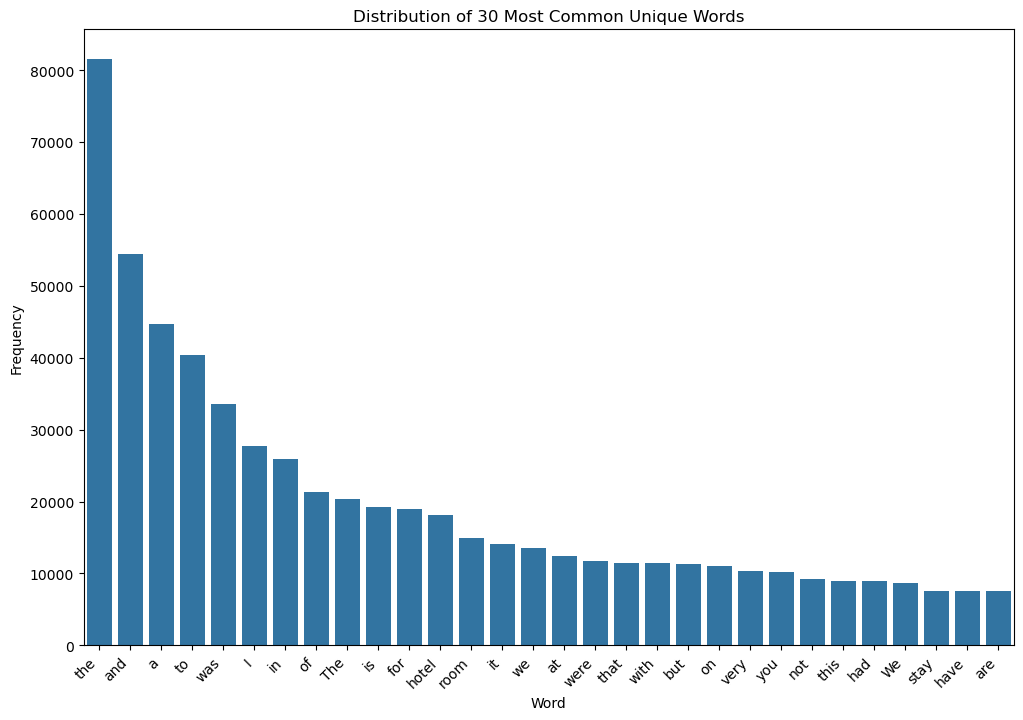

In [96]:
# handwritte code
def plot_most_common_words(df, n=30):
    # Get the text corpus
    text = text_corpus(dev_data)

    # Count the frequency of each word
    word_freq = Counter(text)

    # Get the n most common words
    most_common_words = word_freq.most_common(n)

    # Create a DataFrame for easier plotting
    df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # Plot the distribution of the 30 most common unique words
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Word', y='Frequency', data=df_most_common)
    plt.title('Distribution of {} Most Common Unique Words'.format(n))
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Example usage:
plot_most_common_words(dev_data, n=30)

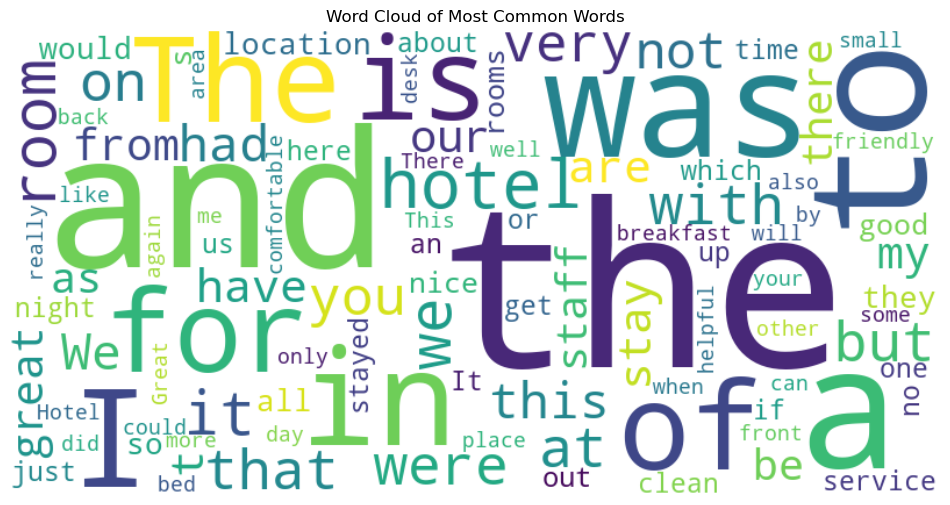

In [97]:
# Word cloud of most common words in reviews
word_freq = Counter(text_corpus(dev_data)).most_common(100)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Common Words')
plt.axis('off')
plt.show()

#### Observation:
The Exploratory Data Analysis shows that we need to further preprocessing for the given data. The data contains neutral words and stop words. Since we already tokenized the text and removed all non-alphanumeric characters. These further preprocessing is required.

* Convert Text to Lowercase: Convert all text to lowercase to ensure consistency and to prevent the model from treating the same words differently based on their case. For example, it is treating 'the' and 'The', 'Hotel' and 'hotel'.

* Remove Stop Words: Remove common stop words that do not contribute much to the meaning of the text. This includes words like 'the', 'is', 'and', etc. NLTK (Natural Language Toolkit) provides a list of common stop words for various languages.

* Stemming or Lemmatization: Reduce words to their root form to normalize variations of words. Stemming and lemmatization are techniques used to achieve this. Stemming cuts off prefixes and suffixes to find the root word, while lemmatization uses vocabulary analysis to return the base or dictionary form of a word.


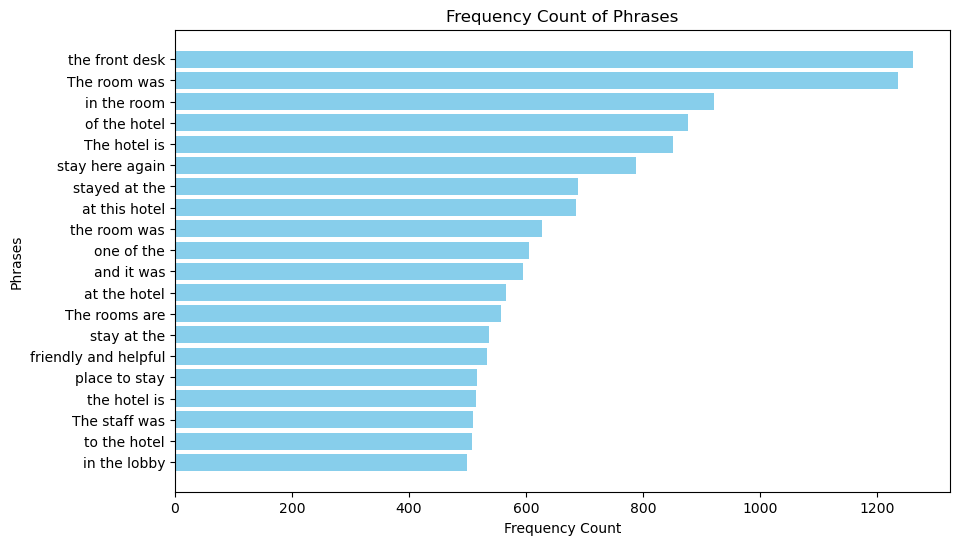

In [98]:
# Identifying common n-grams in the data. Code taken from workshop
# Workshop 2
import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# creating the whole corpus of texts from all values
corpus = text_corpus(dev_data)
n = 20
n_value = 3
ngrams_list = generate_ngrams(corpus, n_value)
ngrams_count = Counter(ngrams_list)
most_common_phrases = ngrams_count.most_common(n)

# Display the most common phrases in the corpus
phrases = [item[0] for item in most_common_phrases]
counts = [item[1] for item in most_common_phrases]

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(phrases, counts, color='skyblue')
plt.xlabel('Frequency Count')
plt.ylabel('Phrases')
plt.title('Frequency Count of Phrases')
plt.gca().invert_yaxis()  # Invert y-axis to display top phrases at the top
plt.show()

### 3. Preprocessing

In [51]:
test_df = dev_data.head()

In [100]:
# (Colab) prompt: write a function to process a list of words to another list with lowercasing, stop words removed and lemmatized and returned the processed text
# edit: provided options for different types of processing.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def process_words(words, lowercase=True, stop_words_removed=True, lemmatize_words=True):
  """
  This function takes a list of words and returns a new list with lowercased, stop words removed and lemmatized words.

  Args:
    words: A list of words.

  Returns:
    processed text according to enabled options.
  """

  if lowercase:
    # Lowercase all words
    words = [word.lower() for word in words]
  if stop_words_removed:
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
  if lemmatize_words:
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
  words = ' '.join(words)
  return words

In [101]:
# applying the processing on the dev_data
dev_data['processed_text'] = dev_data['concat_textandtitle'].apply(process_words)

In [102]:
# creating another column with unprocessed text
dev_data['unprocessed_text'] = dev_data['concat_textandtitle'].apply(lambda x:' '.join(x))

In [110]:
# (Colab) prompt: Write a function that takes input a df and vectorize the 'processed_text' column of that dataframe. And also set labels according to the value in overall column. If the value if above 3.0 set as positive and otherwise negative. Output both the X and y to input to sentiment analysis model
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize_data(df, use_processed_data=True):
  """
  This function takes a df and vectorize the 'processed_text' column of that dataframe. And also set labels according to the value in overall column.
  If the value if above 3.0 set as positive and otherwise negative. Output both the X and y to input to sentiment analysis model

  Args:
      df: A pandas dataframe.

  Returns:
      X: A sparse matrix containing the vectorized 'processed_text' column.
      y: A numpy array containing the labels.
  """

  # Vectorize the 'processed_text' column
  vectorizer = TfidfVectorizer()
  if use_processed_data:
    X = vectorizer.fit_transform(df['processed_text'])
  else:
    X = vectorizer.fit_transform(df['unprocessed_text'])

  # Set labels according to the value in overall column
  y = np.where(df['overall'] > 3.0, 1, 0)

  return X, y


### 4. Selecting supervised method for sentiment classification

In [105]:
# Function to evaluate different classifiers without random oversampling using sklearn pipeline. 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# (Chatgpt - 3.5) function to create pipeline with given input as classifier and outputs the pipeline (without random oversampling)
def create_pipeline(clf):
    return Pipeline([
        ('tfidf', TfidfVectorizer()),
        (clf.__name__, clf())
    ])

# (Hugging Chat) function to evaluate classifiers using the function that takes input as classifier, data and value of cross validation. It outputs the cross validation score.
def evaluate_classifier(clf, X, y, cv=10, label=None):
    pipeline = create_pipeline(clf)
    scores_no_processing = cross_val_score(pipeline, X['unprocessed_text'], y, cv=cv, scoring='accuracy')
    scores_with_processing = cross_val_score(pipeline, X['processed_text'], y, cv=cv, scoring='accuracy')
    mean_accuracy_no_processing = scores_no_processing.mean()
    mean_accuracy_with_processing = scores_with_processing.mean()

    if label is not None:
        print(f"{label} without processing: {mean_accuracy_no_processing}")
        print(f"{label} with processing: {mean_accuracy_with_processing}\n")
    else:
        print(f"The score from {clf.__name__}(without processing): {mean_accuracy_no_processing}")
        print(f"The score from {clf.__name__}(with processing): {mean_accuracy_with_processing}\n")

In [107]:
# Calculating the 10-fold cross validation score without oversampling
for clf in [MultinomialNB, LogisticRegression, RandomForestClassifier, SVC, KNeighborsClassifier, MLPClassifier]:
    evaluate_classifier(clf, dev_data, np.where(dev_data['overall'] > 3.0, 1, 0))

The score from MultinomialNB(without processing): 0.7470000000000001
The score from MultinomialNB(with processing): 0.7733000000000001

The score from LogisticRegression(without processing): 0.891
The score from LogisticRegression(with processing): 0.8914

The score from RandomForestClassifier(without processing): 0.8209
The score from RandomForestClassifier(with processing): 0.8407

The score from SVC(without processing): 0.8971
The score from SVC(with processing): 0.8923

The score from KNeighborsClassifier(without processing): 0.7854000000000001
The score from KNeighborsClassifier(with processing): 0.8165000000000001

The score from MLPClassifier(without processing): 0.8782
The score from MLPClassifier(with processing): 0.8712



In [122]:
# Handwritten code
# new function to evaluate classifiers with vectorization and oversampling
from imblearn.over_sampling import RandomOverSampler
def evaluate_classifiers_with_oversampling(clf, X, cv=10, label=None):
    X_unprocessed, y = vectorize_data(X, use_processed_data=False)
    X_processed, y = vectorize_data(X, use_processed_data=True)
    ros = RandomOverSampler(random_state=1234)
    X_resampled_unprocessed, y_resampled = ros.fit_resample(X_unprocessed, y)
    X_resampled_processed, y_resampled = ros.fit_resample(X_processed, y)
    clf.fit(X_resampled_processed, y_resampled)
    scores_no_processing = cross_val_score(clf, X_resampled_unprocessed, y_resampled, cv=cv, scoring='accuracy')
    scores_with_processing = cross_val_score(clf, X_resampled_processed, y_resampled, cv=cv)
    mean_accuracy_no_processing = scores_no_processing.mean()
    mean_accuracy_with_processing = scores_with_processing.mean()
    if label is not None:
        print(f"{label} without processing: {mean_accuracy_no_processing}")
        print(f"{label} with processing: {mean_accuracy_with_processing}\n")

In [123]:
# Calculating the 10-fold cross validation score with oversampling
for name, clf in {'mnb': MultinomialNB(), 'logreg':LogisticRegression(), 'rf':RandomForestClassifier(), 'svc':SVC(), 'knn':KNeighborsClassifier(), 'mlp':MLPClassifier()}.items():
    evaluate_classifiers_with_oversampling(clf, dev_data, label=name)

The score from (with processing): 0.8862297400083301

The score from (with processing): 0.9107813852997009

The score from (with processing): 0.9639994321232106

The score from (with processing): 0.9585810507789032

The score from (with processing): 0.8160766013138263

The score from (with processing): 0.9475395609861124



#### Observations
 Based on the given scores, it can be observed that applying text pre-processing techniques generally leads to improved performance across all the machine learning algorithms used. This indicates that proper cleaning and normalization of input data significantly contribute to model accuracy. Among the evaluated models, Support Vector Machine achieves the highest average scores in all scenarios - with, without pre-processing and random oversampling. Its slight improvement when incorporating text pre-processing demonstrates its robustness and suitability for this specific problem.
 However, it is a big improvement in the accuracy when we do the random oversampling with preprocessing. Overall, considering computational efficiency along with high accuracy makes SVM an ideal choice among the compared classifiers.

Here's the requested Markdown table summarizing the evaluation results:

| Classifier          | Score (Without Processing) | Score (With Processing)   | Score (With Processing and Random OVersampling) |
|---------------------|----------------------------|---------------------------|---------------------------|
| Multinomial NB      | 0.747                      | 0.7733                    |0.8862
| Logistic Regression | 0.891                      | 0.8914                   |0.9107
| Random Forest       | 0.8175                     | 0.84                    |0.964
| SVM                 | 0.8971                     | 0.8923                    |0.958
| KNN                | 0.7854                     | 0.8165                    |0.816
| MLP                | 0.877                     | 0.8717                    |0.9475


### 5. Sentiment classification using VADER lexicon and method

In [126]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

def classify_with_VADER(df, column_name):
    output = []
    for review in df[column_name]:
        score = analyser.polarity_scores(review)['compound']
        label = 1.0 if score > 0 else 0.0
        output.append(label)
    return output


output_vader = classify_with_VADER(dev_data, 'processed_text')
print(classification_report(np.where(dev_data['overall'] > 3.0, 1, 0), output_vader))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/haider/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


              precision    recall  f1-score   support

           0       0.95      0.22      0.35      2709
           1       0.77      1.00      0.87      7291

    accuracy                           0.78     10000
   macro avg       0.86      0.61      0.61     10000
weighted avg       0.82      0.78      0.73     10000



### 6. Combining VADER with the best classifier

In [127]:
# preprocessing the train_data and test_data
train_data['processed_text'] = train_data['concat_textandtitle'].apply(process_words)
test_data['processed_text'] = test_data['concat_textandtitle'].apply(process_words)
train_data['unprocessed_text'] = train_data['concat_textandtitle'].apply(lambda x:' '.join(x))
test_data['unprocessed_text'] = test_data['concat_textandtitle'].apply(lambda x:' '.join(x))

In [128]:
# predictions without combining vader
pipeline_to_combine = create_pipeline(SVC)
pipeline_to_combine.fit(train_data['processed_text'], np.where(train_data['overall'] > 3.0, 1, 0))
predictions = pipeline_to_combine.predict(test_data['processed_text'])

print(classification_report(np.where(test_data['overall'] > 3.0, 1, 0),predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2676
           1       0.90      0.97      0.93      7324

    accuracy                           0.90     10000
   macro avg       0.90      0.84      0.86     10000
weighted avg       0.90      0.90      0.90     10000



In [72]:
# combining Vader and SVM
output_vader = classify_with_VADER(test_data, 'processed_text')

def compare_outputs(output_vader, output_svm):
    final_outputs = []
    for vader, svm in zip(output_vader, output_svm):
        if vader == svm:
            final_outputs.append(vader)
        else:
            final_outputs.append(svm)
    return final_outputs

final_outputs = compare_outputs(output_vader, predictions)
print(classification_report(np.where(test_data['overall'] > 3.0, 1, 0),final_outputs))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2676
           1       0.90      0.97      0.93      7324

    accuracy                           0.90     10000
   macro avg       0.90      0.84      0.86     10000
weighted avg       0.90      0.90      0.90     10000



In [129]:
# combining Vader and SVM with random over sampling
def predictions_with_oversampling(clf, train_df, test_df):
    X_processed, y = vectorize_data(train_df, use_processed_data=True)
    X_processed_test, y_test = vectorize_data(test_df, use_processed_data=True)
    ros = RandomOverSampler(random_state=1234)
    X_resampled_processed, y_resampled = ros.fit_resample(X_processed, y)
    clf.fit(X_resampled_processed, y_resampled)
    predictions = clf.predict(X_processed_test)
    output_vader = classify_with_VADER(test_df, 'processed_text')
    final_outputs = compare_outputs(output_vader, predictions)
    return classification_report(y_test, final_outputs)

In [131]:
# combine with logistic regression
pipeline_to_combine = create_pipeline(LogisticRegression)
pipeline_to_combine.fit(train_data['processed_text'], np.where(train_data['overall'] > 3.0, 1, 0))
predictions = pipeline_to_combine.predict(test_data['processed_text'])

final_outputs = compare_outputs(output_vader, predictions)
print(classification_report(np.where(test_data['overall'] > 3.0, 1, 0),final_outputs))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      2676
           1       0.90      0.97      0.93      7324

    accuracy                           0.90     10000
   macro avg       0.89      0.83      0.86     10000
weighted avg       0.90      0.90      0.89     10000



In [132]:
# combine with MLP
pipeline_to_combine = create_pipeline(MLPClassifier)
pipeline_to_combine.fit(train_data['processed_text'], np.where(train_data['overall'] > 3.0, 1, 0))
predictions = pipeline_to_combine.predict(test_data['processed_text'])

final_outputs = compare_outputs(output_vader, predictions)
print(classification_report(np.where(test_data['overall'] > 3.0, 1, 0),final_outputs))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2676
           1       0.91      0.92      0.91      7324

    accuracy                           0.87     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.87      0.87      0.87     10000



#### Observations:

Based on the given observations, combining VADER with different machine learning algorithms such as SVM, Logistic Regression, and Multi-Layer Perceptron (MLP) results in high performance metrics for sentiment classification tasks. Specifically, all three combinations achieve high overall accuracy ranging from 0.87 to 0.90, indicating successful prediction rates across all categories. Moreover, they also yield impressive F1-scores, which measure the harmonic mean between precision and recall, suggesting good balances between these two measures. Notably, combining VADER with SVM achieves the highest F1-score of 0.86, while combining VADER with Logistic Regression comes close with an F1-score of 0.86. Meanwhile, combining VADER with MLP yields slightly lower but still respectable F1-score of 0.84. These results indicate that incorporating VADER into various classifiers enhances sentiment analysis capabilities compared to standalone methods. Overall, these findings suggest that utilizing VADER in combination with other popular machine learning techniques provides a powerful approach for performing sentiment classification tasks.

### 7. Trainig and testing the final method

In [136]:
# function to train the model and give results combining the results with vader and classifier
def train_and_evaluate(classifier, train_data, test_data):
    pipeline = create_pipeline(classifier)
    pipeline.fit(train_data['processed_text'], np.where(train_data['overall'] > 3.0, 1, 0))
    classifier_predictions = pipeline.predict(test_data['processed_text'])
    vader_predictions = classify_with_VADER(test_data, 'processed_text')
    final_outputs = compare_outputs(vader_predictions, classifier_predictions)
    return classification_report(np.where(test_data['overall'] > 3.0, 1, 0),final_outputs)

In [137]:
print(train_and_evaluate(SVC, train_data, test_data))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2676
           1       0.90      0.97      0.93      7324

    accuracy                           0.90     10000
   macro avg       0.90      0.84      0.86     10000
weighted avg       0.90      0.90      0.90     10000



In [138]:
print(train_and_evaluate(LogisticRegression, train_data, test_data))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      2676
           1       0.90      0.97      0.93      7324

    accuracy                           0.90     10000
   macro avg       0.89      0.83      0.86     10000
weighted avg       0.90      0.90      0.89     10000



#### Observation:

From the outputs, we can observe that both Support Vector Classifier (SVC) and Logistic Regression produce similar results for sentiment classification. Both models have achieved an accuracy of 0.90, demonstrating strong predictive power. They also exhibit comparable F1-scores, measuring the harmonic mean of precision and recall, which suggests well-rounded performance in terms of false positives and negatives.
The better model could be Logistic Regression if we consider the time complexity to run. Logistic Regression is faster than SVM.



### 8. Reviews aspect prediction

We can implement a multilabel classification for each aspect of the review. The model will predict the label for each aspect of the review.
1. **Data Preparation**:
   - Begin by breaking down review titles and texts into tokens, eliminating common words (stopwords), punctuation, and applying stemming or lemmatization to standardize the text content.
   - Transform the textual data into numeric values with the help of GloVe embedding or Word2Vec embedding. Another useful methodology can be the like TF-IDF (Term Frequency-Inverse Document Frequency) 

2. **Multi-Aspect Classification Framework**:
   - Opt for a sophisticated model like Bidirectional LSTM (Long Short-Term Memory) or a Transformer-based architecture like BERT (Bidirectional Encoder Representations from Transformers).
   - The model should take the preprocessed text data as input and generate predictions for each aspect label simultaneously.
   - Employ a multi-label classification loss function like Binary Cross-Entropy to train the model on the dataset effectively.

3. **Model Training and Assessment**:
   - Segment the dataset into training and validation subsets to facilitate model training and assess its predictive performance.
   - Utilize evaluation metrics such as F1-score, precision, recall, and accuracy to gauge the model's proficiency in predicting each aspect label accurately.

4. **Refinement Process**:
   - Enhance the model's performance through fine-tuning by adjusting hyperparameters, exploring diverse architectures, or integrating ensemble techniques to optimize results.

5. **Application**:
   - Post-training, leverage the model to forecast aspects for new reviews by feeding in the review title and text for analysis.

By implementing this tailored approach, one can effectively forecast diverse hotel aspects from review titles and texts. This strategy amalgamates natural language processing techniques with deep learning models to extract valuable insights from textual data. Additional resources such as academic papers on multi-label classification in NLP and sentiment analysis can offer deeper insights into this methodology.

References:

Nam, D., Kim, E., Shim, T., & Lee, J. (2014, August). Investigating aspects in customer reviews: From feature extraction to topic modeling. In Proceedings of the 20th ACM SIGKDD international conference on knowledge discovery and data mining (pp. 1381-1389)


### 9. References

1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
4. https://imbalanced-learn.org/stable/over_sampling.html
5. Colab AI generate
5. ChatGpt 3.5
6. HuggingChat - Mixtral 8x7b model
7. Workshop 2